In [327]:
#importamos todas las bibliotecas ya vistas en clases.
import numpy as np
import pandas as pd #Graph libraries

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from statsmodels.tsa.stattools import acf, pacf


In [332]:
#Hacemos la lectura del archivo CSV y definimos las columnas.
url = 'https://raw.githubusercontent.com/carloslizarragac/FisicaComputacional1/master/Eval1/data/co2_mlo_DailyData.txt'

my_cols = ['Sitio', 'Año', 'Mes', 'Día', 'Hora', 'Minuto', 'Segundo', 'Tiempo(Año en Decimal)', 'Value', 'Value_Std_Dev','nValue', 'Latitud', 'Longitud', 'Altitud', 'Elevación', 'Intake_Height', 'QcFlag']
df_dist = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=152, skipfooter=1, engine='python')


In [334]:
#Cambiamos los valores -999.99 y -99.99 por NaN.
value_Nulo = -999.99
std_dev_Nulo = -99.99
df_dist = df_dist.replace(to_replace=value_Nulo, value='', regex=True)
df_dist = df_dist.replace(to_replace=std_dev_Nulo, value='', regex=True)
#Convertimos a valores numéricos.
cols_list = ['Value','Value_Std_Dev']
for cols in cols_list:
  df_dist[cols] = pd.to_numeric(df_dist[cols], errors='coerce')
#Imprimimos para observar que tenemos los datos como queremos.
df_dist.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17165 entries, 0 to 17164
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sitio                   17165 non-null  object 
 1   Año                     17165 non-null  int64  
 2   Mes                     17165 non-null  int64  
 3   Día                     17165 non-null  int64  
 4   Hora                    17165 non-null  int64  
 5   Minuto                  17165 non-null  int64  
 6   Segundo                 17165 non-null  int64  
 7   Tiempo(Año en Decimal)  17165 non-null  float64
 8   Value                   13935 non-null  float64
 9   Value_Std_Dev           13935 non-null  float64
 10  nValue                  17165 non-null  int64  
 11  Latitud                 17165 non-null  float64
 12  Longitud                17165 non-null  float64
 13  Altitud                 17165 non-null  float64
 14  Elevación               17165 non-null

In [347]:
#Creamos una columna para la fecha a partir de las columnas del mes, dia y año.
df_dist['Fecha'] = pd.to_datetime(dict(year=df_dist['Año'],month=df_dist['Mes'],day=df_dist['Día']))
#Excluimos algunas columnas que son las que nos interesan.
df_dist = df_dist.reindex(columns=['Fecha','Value','Value_Std_Dev','Año','Mes','Día'])
df_dist.head()

,Fecha,Value,Value_Std_Dev,Año,Mes,Día
Fecha,,,,,,
1973-01-01,1973-01-01,NaN,NaN,1973,1,1
1973-01-02,1973-01-02,NaN,NaN,1973,1,2
1973-01-03,1973-01-03,NaN,NaN,1973,1,3
1973-01-04,1973-01-04,NaN,NaN,1973,1,4
1973-01-05,1973-01-05,NaN,NaN,1973,1,5


Text(0.5, 1.0, 'Concentración de CO2 en Mauna Loa, Hawaii')

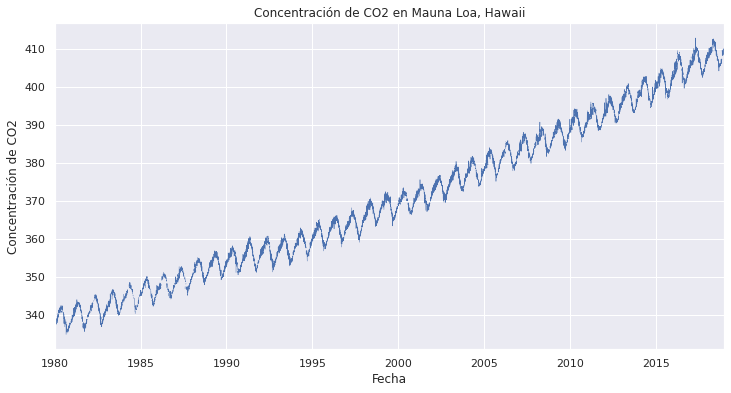

In [348]:
#Creamos un índice para la fecha
df_dist = df_dist.set_index('Fecha')
#Creamos el rango de años que se nos solicita (1980-2019)
df_a = df_dist[(df_dist['Año']>= 1980) & (df_dist['Año']< 2019)]

#Creamos la gráfica de concentración de CO2.
sns.set(rc={'figure.figsize':(12, 6)})
df_a['Value'].plot(linewidth=0.5);
plt.ylabel('Concentración de CO2');
plt.title('Concentración de CO2 en Mauna Loa, Hawaii')

In [349]:
#Haciendo uso de ts_test.ffill para recorrer los datos vacios.
df_a.ffill(axis = 0,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
    
    #Determinar la Estadística de promedios móviles
    rolmean = df_ts.rolling(window=365, center=True).mean()
    rolstd = df_ts.rolling(window=365, center=True).std() 
    
    # Define el tamaño de la figura
    plt.rcParams["figure.figsize"] = (12,6)

    #Graficar la Estadística de promedios móviles 
    plt.plot(df_ts, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Promedio móvil')
    plt.plot(rolstd, color='black', label = 'Desviación estándar móvil')
 
    plt.legend(loc='best')
    plt.title('Promedio Móvil y Desviación Estándar')
    plt.grid()
    plt.show()
 
    #Realiza la Prueba Aumentada de  Dickey-Fuller:
    print('Resultados de la Prueba de Dickey-Fuller:')
    dftest = adfuller(df_ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], 
                         index=['Test Estadístico','valor P','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Valor Crítico (%s)'%key] = value
    print(dfoutput)

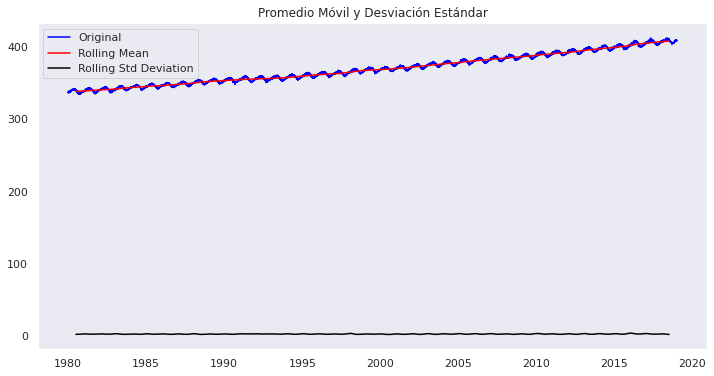

Resultados de la Prueba de Dickey-Fuller:
Test Statistic                    -1.155189
p-value                            0.692569
#Lags Used                        42.000000
Number of Observations Used    14202.000000
Critical Value (1%)               -3.430811
Critical Value (5%)               -2.861744
Critical Value (10%)              -2.566878
dtype: float64


In [353]:
#Probamos la estacionaridad de la serie de tiempo.
star, end = '1980-01', '2019-12'
rango = df_a.loc[star:end].copy()
#Nos interesa solo la columna de los datos de CO2:
rango = rango['Value']
rango.ffill(axis = 0, inplace= True)
#Realizamos el test:
test_stationarity(rango)


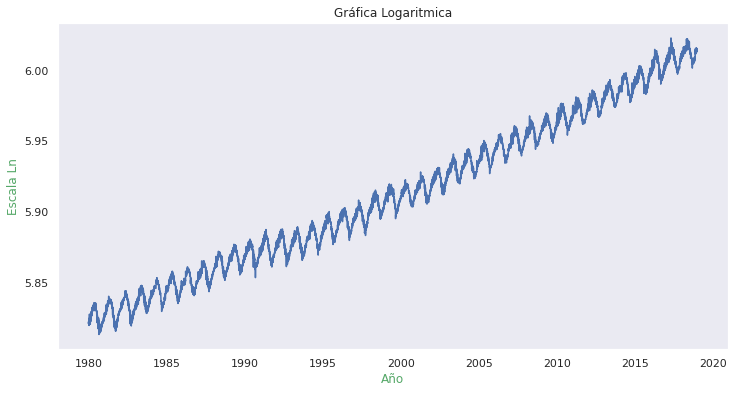

In [356]:
#Observamos anteriormente que el p-valor no es estacionario, por lo que cambiamos la escala.
rango_logaritmico = np.log(rango)
plt.plot(rango_logaritmico)
plt.xlabel('Año', color = 'g')
plt.ylabel('Escala Ln', color='g')
plt.title('Gráfica Logaritmica')
plt.grid()
plt.show()

Text(0.5, 1.0, 'Promedio Móvil Centrado')

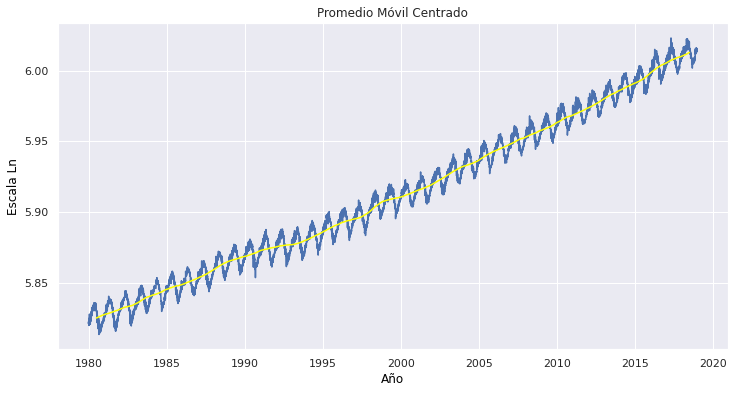

In [359]:
#Promedio a 365 días.
ok = rango_logaritmico.rolling(365, center= True).mean()
plt.plot(rango_logaritmico)
plt.plot(ok, color = 'yellow')
plt.xlabel('Año',color='black')
plt.ylabel('Escala Ln', color='black')
plt.title('Promedio Móvil Centrado')

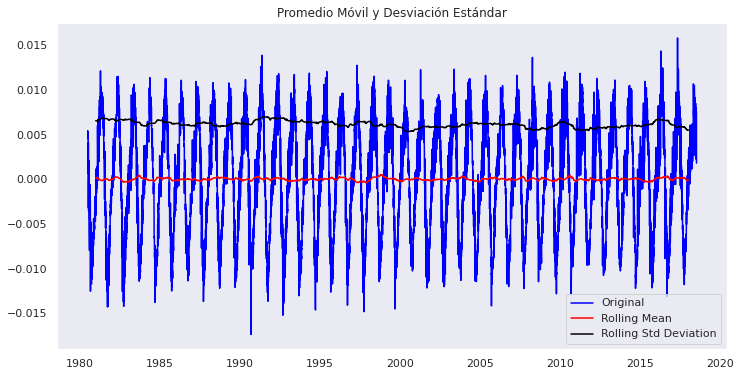

Resultados de la Prueba de Dickey-Fuller:
Test Statistic                -1.385363e+01
p-value                        6.931864e-26
#Lags Used                     4.200000e+01
Number of Observations Used    1.383800e+04
Critical Value (1%)           -3.430823e+00
Critical Value (5%)           -2.861749e+00
Critical Value (10%)          -2.566881e+00
dtype: float64


In [360]:
#Hacemos la diferencia entre el rango_logaritmico y el promedio movil
Diferencia = rango_logaritmico - ok
Diferencia.dropna(inplace=True)
test_stationarity(Diferencia)

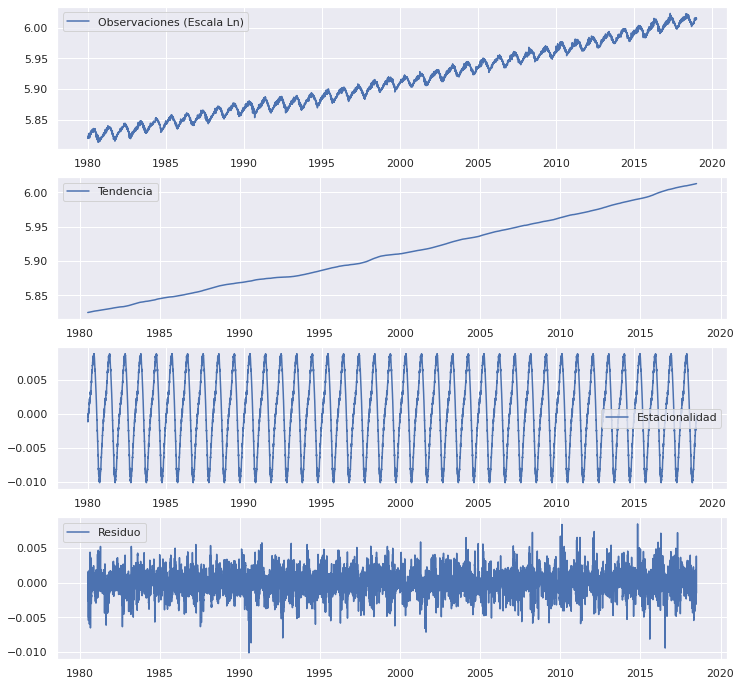

In [365]:
#Descomponemos con statsmodels.tsa
Descomposicion = sm.tsa.seasonal_decompose(rango_logaritmico.interpolate(), model='additive', freq=365)
Tendencia = Descomposicion.trend
Estacionalidad = Descomposicion.seasonal
Residuo = Descomposicion.resid
plt.rcParams['figure.figsize'] = (12,12)
plt.subplot(411)
plt.plot(rango_logaritmico, label='Observaciones (Escala Ln)')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(Tendencia, label='Tendencia')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(Estacionalidad, label='Estacionalidad')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(Residuo, label='Residuo')
plt.legend(loc='best')


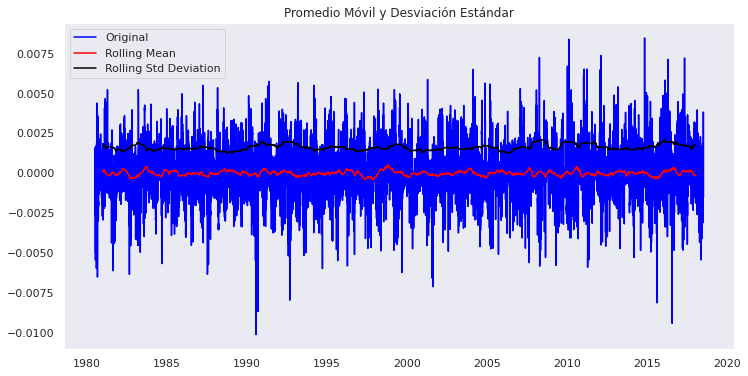

Resultados de la Prueba de Dickey-Fuller:
Test Statistic                -1.847383e+01
p-value                        2.137999e-30
#Lags Used                     2.200000e+01
Number of Observations Used    1.385800e+04
Critical Value (1%)           -3.430822e+00
Critical Value (5%)           -2.861749e+00
Critical Value (10%)          -2.566881e+00
dtype: float64


In [367]:
Residuo_Desc = Residuo 
Residuo_Desc.dropna(inplace=True)
test_stationarity(Residuo_Desc)

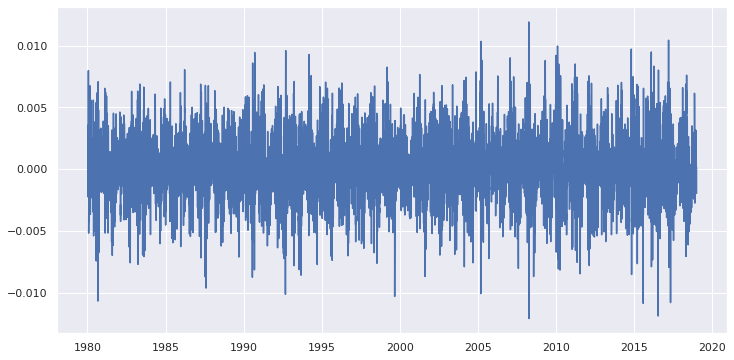

In [369]:
#Usando la función shift para diferenciar en un periodo de 7 días.
Diff_shift = rango_logaritmico - rango_logaritmico.shift(periods=7)
plt.plot(Diff_shift);

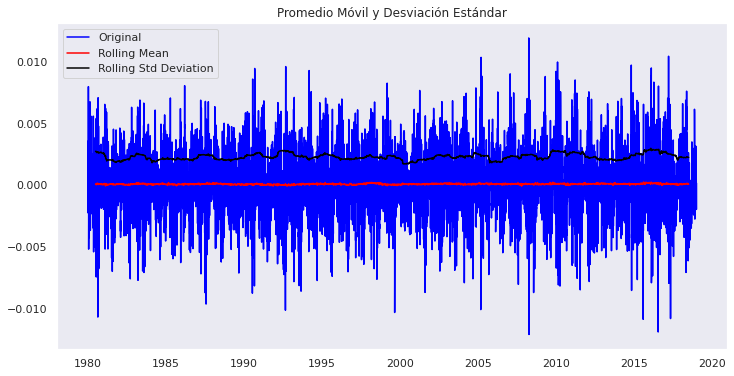

Resultados de la Prueba de Dickey-Fuller:
Test Statistic                -9.876005e+00
p-value                        3.881021e-17
#Lags Used                     4.200000e+01
Number of Observations Used    1.419500e+04
Critical Value (1%)           -3.430811e+00
Critical Value (5%)           -2.861744e+00
Critical Value (10%)          -2.566878e+00
dtype: float64


In [370]:
Diff_shift.dropna(inplace=True)
test_stationarity(Diff_shift)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


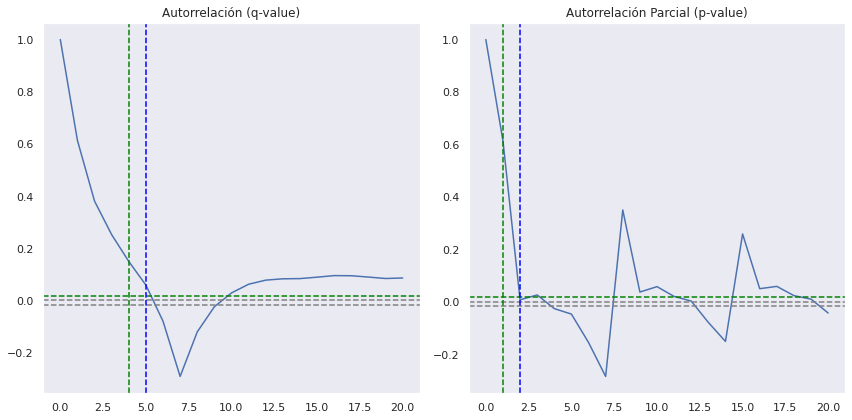

In [371]:
#Construyendo el modelo ARIMA
lag_acf = acf(Diff_shift, nlags=20)
lag_pacf = pacf(Diff_shift, nlags=20, method = 'ols')

# Tamaño de las gráficas
plt.rcParams["figure.figsize"] = (12,6)

# Gráfica de ACF (Autocorrelation Function)
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Diff_shift)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(Diff_shift)), linestyle='--', color='green')
# Graficamos unas líneas verticales como referencias
#plt.axvline(x=3, linestyle='--', color='green')
plt.axvline(x=4, linestyle='--', color='green')
plt.axvline(x=5, linestyle='--', color='blue')
plt.grid()
plt.title('Autorrelación (q-value)')

# Gráfica de PACF (Partial Autocorrelation Function)
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Diff_shift)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(Diff_shift)), linestyle='--', color='green')
# Graficamos unas líneas verticales como referencias 
plt.axvline(x=1, linestyle='--', color='green')
plt.axvline(x=2, linestyle='--', color='blue')
plt.grid()
plt.title('Autorrelación Parcial (p-value)')

plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                14244
Model:                 ARIMA(2, 1, 0)   Log Likelihood               73491.209
Method:                       css-mle   S.D. of innovations              0.001
Date:                Thu, 25 Feb 2021   AIC                        -146974.417
Time:                        02:19:00   BIC                        -146944.161
Sample:                    01-02-1980   HQIC                       -146964.353
                         - 12-31-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.352e-05   8.12e-06      1.664      0.096    -2.4e-06    2.94e-05
ar.L1.D.Value    -0.2427      0.008    -29.505      0.000      -0.259      -0.227
ar.L2.D.Value    -0.1909      0.008    -

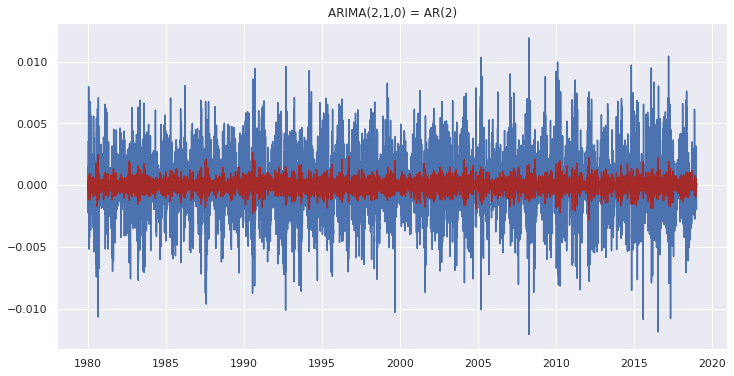

In [372]:
#Realizamos el modelo AR
model = ARIMA(rango_logaritmico, order=(2,1,0), missing='drop')
results_AR = model.fit(displ=-1)
plt.plot(Diff_shift)
plt.plot(results_AR.fittedvalues, color='brown')
plt.title('ARIMA(2,1,0) = AR(2)')
print(results_AR.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                14244
Model:                 ARIMA(0, 1, 4)   Log Likelihood               73793.711
Method:                       css-mle   S.D. of innovations              0.001
Date:                Thu, 25 Feb 2021   AIC                        -147575.423
Time:                        02:19:42   BIC                        -147530.038
Sample:                    01-02-1980   HQIC                       -147560.327
                         - 12-31-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.353e-05   4.81e-06      2.815      0.005    4.11e-06    2.29e-05
ma.L1.D.Value    -0.2999      0.008    -35.820      0.000      -0.316      -0.284
ma.L2.D.Value    -0.1855      0.009    -

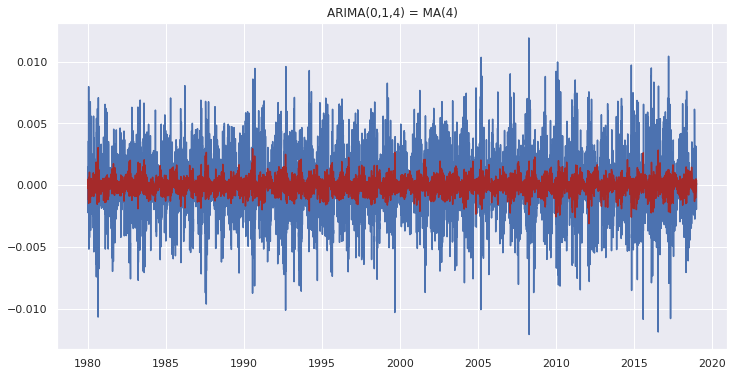

In [373]:
#Realizando el modelo MA
model = ARIMA(rango_logaritmico, order=(0,1,4), missing='drop')
results_MA = model.fit(displ=-1)
plt.plot(Diff_shift)
plt.plot(results_MA.fittedvalues, color='brown')
plt.title('ARIMA(0,1,4) = MA(4)')
print(results_MA.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                14244
Model:                 ARIMA(2, 1, 4)   Log Likelihood               73794.840
Method:                       css-mle   S.D. of innovations              0.001
Date:                Thu, 25 Feb 2021   AIC                        -147573.681
Time:                        02:20:44   BIC                        -147513.168
Sample:                    01-02-1980   HQIC                       -147553.553
                         - 12-31-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.353e-05   4.83e-06      2.802      0.005    4.07e-06     2.3e-05
ar.L1.D.Value     0.3947      1.241      0.318      0.750      -2.038       2.827
ar.L2.D.Value    -0.2040      0.475     

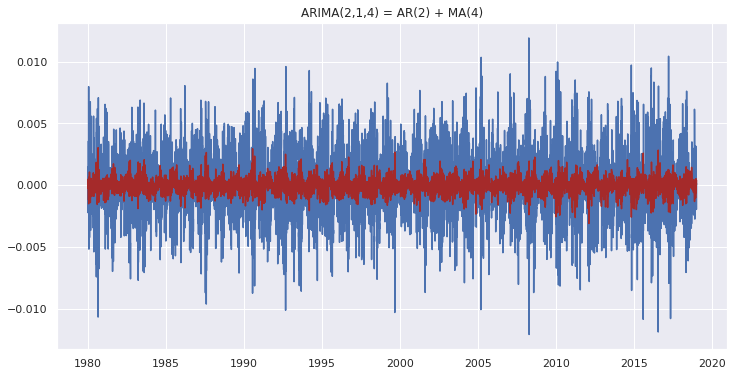

In [374]:
#Realizando el modelo ARIMA (p,d,q)
model = ARIMA(rango_logaritmico, order=(2,1,4), missing='drop')
results_ARIMA = model.fit(displ=-1)
plt.plot(Diff_shift)
plt.plot(results_ARIMA.fittedvalues, color='brown')
plt.title('ARIMA(2,1,4) = AR(2) + MA(4)')
print(results_ARIMA.summary())

In [381]:
Predicciones = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(Predicciones)

Fecha
1980-01-02    0.000014
1980-01-03    0.000338
1980-01-04    0.000010
1980-01-05   -0.000023
1980-01-06    0.000080
                ...   
2018-12-27    0.000178
2018-12-28    0.000424
2018-12-29    0.000202
2018-12-30    0.000382
2018-12-31    0.000034
Length: 14244, dtype: float64


In [382]:
Predicciones_ln = pd.Series(rango_logaritmico, index=rango_logaritmico.index)
Predicciones_ln = Predicciones_ln.add(Predicciones)
print(Predicciones.head())
print(Predicciones.tail())

Fecha
1980-01-02    0.000014
1980-01-03    0.000338
1980-01-04    0.000010
1980-01-05   -0.000023
1980-01-06    0.000080
dtype: float64
Fecha
2018-12-27    0.000178
2018-12-28    0.000424
2018-12-29    0.000202
2018-12-30    0.000382
2018-12-31    0.000034
dtype: float64


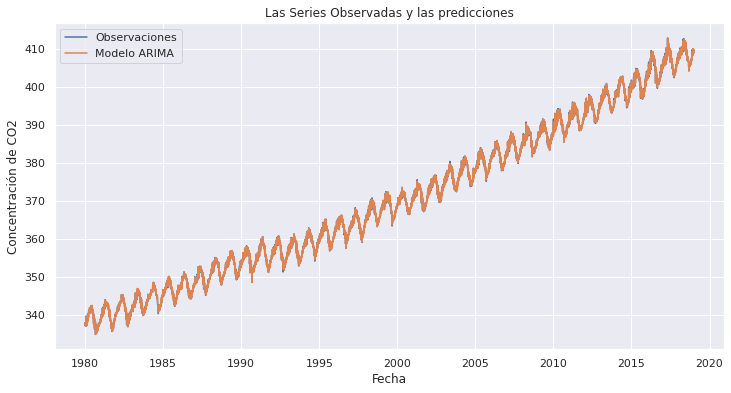

In [385]:
Pred = np.e**(Predicciones_ln)
plt.rcParams['figure.figsize'] = (12,6)
plt.plot(rango,label='Observaciones');
plt.plot(Pred, label='Modelo ARIMA');
plt.xlabel('Fecha')
plt.ylabel('Concentración de CO2')
plt.title('Las Series Observadas y las predicciones')
plt.legend(loc='best');

In [386]:
#Determinamos el error.
ERROR = np.sqrt(np.mean((Pred - rango)**2))
print('Error:', ERROR)

Error: 0.18239807599085786


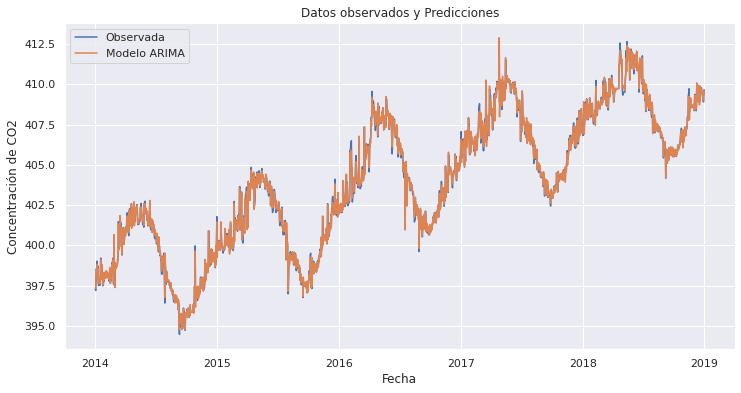

In [387]:
Contrast = rango.tail(1825)
Pred_ARIMA_l = Pred.tail(1825)
plt.plot(Contrast, label='Observada');
plt.plot(Pred_ARIMA_l,label='Modelo ARIMA');
plt.xlabel('Fecha')
plt.ylabel('Concentración de CO2')
plt.title('Datos observados y Predicciones')
plt.legend(loc='best');